In [1]:
import os
import glob
from main_nn import TaxiFarePredictorNN

In [2]:
dataset_directory = 'dataset/'
model_directory = 'train_model/'

model_files = os.path.join(model_directory, 'best_model_3.pth')
csv_files = glob.glob(os.path.join(dataset_directory, 'main.csv'))

print('model_files:', model_files)
print('csv_files:', csv_files)

if not csv_files:
    print("No CSV files found in the dataset directory.")
else:
    csv_file_path = csv_files[0]  
    print("CSV file to be used:", csv_file_path)

model_files: train_model/best_model_3.pth
csv_files: ['dataset/main.csv']
CSV file to be used: dataset/main.csv


/home/deep/.local/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Loading data...
Data loaded successfully!
Initial shape of the data: (2964624, 5)
Dropping rows with missing values...
Shape after dropping missing values: (2964624, 5)
Removing rows with negative fare amounts...
Shape after removing negative fare amounts: (2927324, 5)
Removing outliers...
Shape after removing outliers from 'trip_distance': (2551830, 5)
Shape after removing outliers from 'total_amount': (2477498, 5)
Shape after removing outliers from 'trip_duration': (2433569, 5)
Sampling the data...
Shape after sampling: (2433569, 5)
Scaling the features...
Splitting the data into training and testing sets...
Data split into training and testing sets successfully!
Generating exploratory plots...


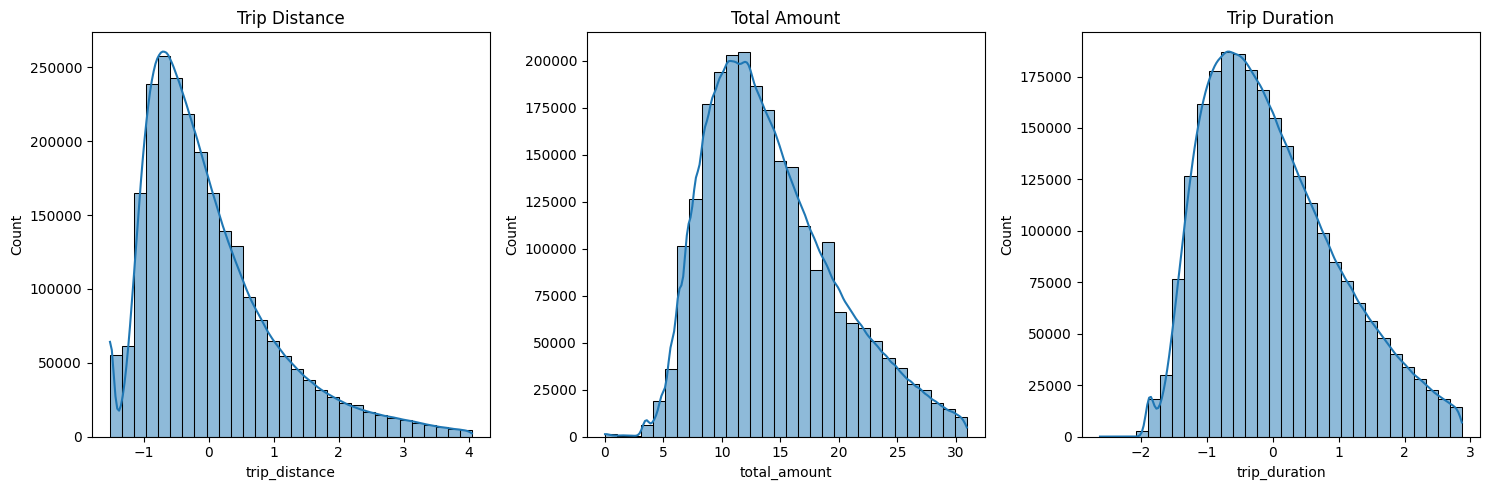

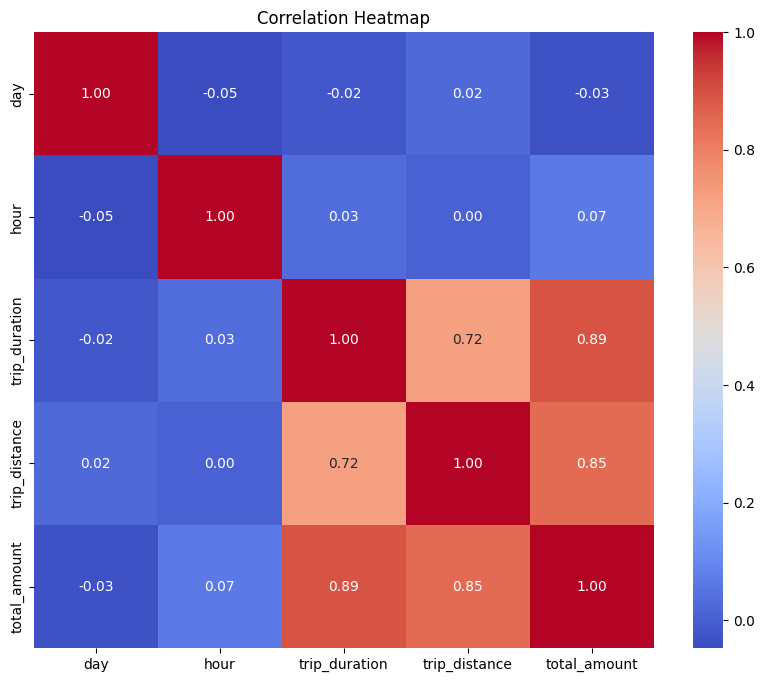

Exploratory plots generated successfully!
Data preprocessing completed successfully!


In [3]:
predictor = TaxiFarePredictorNN(
    csv_file_path,       
    n_samples=2_900_000,   # Number of samples to be used from the dataset for training
    batch_size=32,       # Batch size for training the neural network
    epochs=500,          # Number of epochs to train the model
    learning_rate=0.00001, # Learning rate for the optimizer
    weight_decay=1e-5,   # Weight decay (L2 regularization) parameter to prevent overfitting
    patience=5,         # Number of epochs with no improvement after which training will be stopped (early stopping)
    factor=0.6,          # Factor by which the learning rate will be reduced if there is no improvement (learning rate scheduler)
    early_stopping=True,
    early_stopping_patience = 10,
    model_save_path=model_files 
)

# Load and preprocess the data
X_train, y_train = predictor.load_and_preprocess_data()


Training the model...


Training Progress:   0%|          | 0/500 [00:00<?, ?it/s]

Epoch 1/500: Validation loss improved to 2.8512. Saving the best model.
Epoch 1/500 - Train Loss: 15.7268, Validation Loss: 2.8512
Epoch 2/500: Validation loss improved to 2.7100. Saving the best model.
Epoch 2/500 - Train Loss: 2.8006, Validation Loss: 2.7100
Epoch 3/500: Validation loss improved to 2.6425. Saving the best model.
Epoch 3/500 - Train Loss: 2.6994, Validation Loss: 2.6425
Epoch 4/500: Validation loss improved to 2.6036. Saving the best model.
Epoch 4/500 - Train Loss: 2.6494, Validation Loss: 2.6036
Epoch 5/500: Validation loss improved to 2.5768. Saving the best model.
Epoch 5/500 - Train Loss: 2.6186, Validation Loss: 2.5768
Epoch 6/500: Validation loss improved to 2.5568. Saving the best model.
Epoch 6/500 - Train Loss: 2.5948, Validation Loss: 2.5568
Epoch 7/500: Validation loss improved to 2.5463. Saving the best model.
Epoch 7/500 - Train Loss: 2.5762, Validation Loss: 2.5463
Epoch 8/500: Validation loss improved to 2.5249. Saving the best model.
Epoch 8/500 - Tra

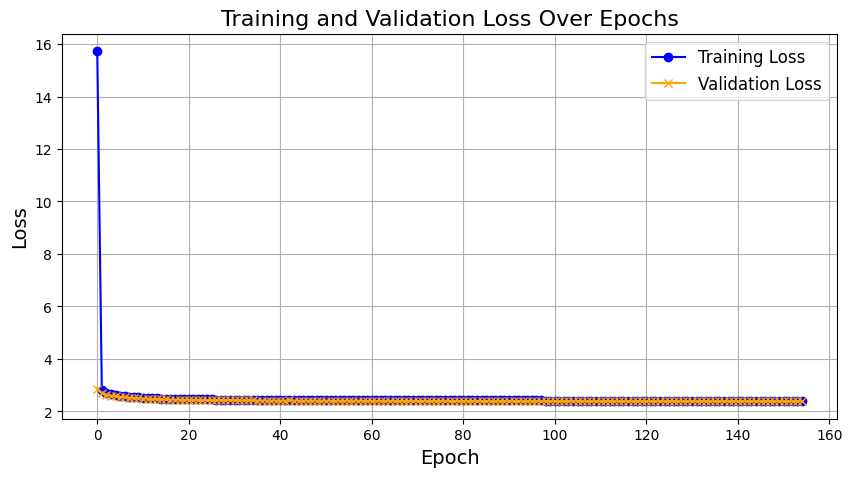

Model training completed successfully! The best model has been saved as train_model/best_model_3.pth


In [4]:
predictor.train_model()

In [5]:
predictor.calculate_residuals(X_train, y_train, batch_size=32)

Calculating residuals...


Calculating residuals:   0%|          | 0/60840 [00:00<?, ?batch/s]

Residuals calculated. Standard deviation of residuals: 1.5536


Evaluating the model...


/home/deep/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


+--------------------------------+-------------+
| Metric                         |       Value |
+================================+=============+
| Mean Absolute Error            | 0.987322    |
+--------------------------------+-------------+
| Root Mean Squared Error        | 1.54565     |
+--------------------------------+-------------+
| R² Score                       | 0.921376    |
+--------------------------------+-------------+
| Mean Absolute Percentage Error | 9.33339e+12 |
+--------------------------------+-------------+
| Median Absolute Error          | 0.681544    |
+--------------------------------+-------------+
| Explained Variance Score       | 0.921376    |
+--------------------------------+-------------+
generating plot...


/home/deep/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


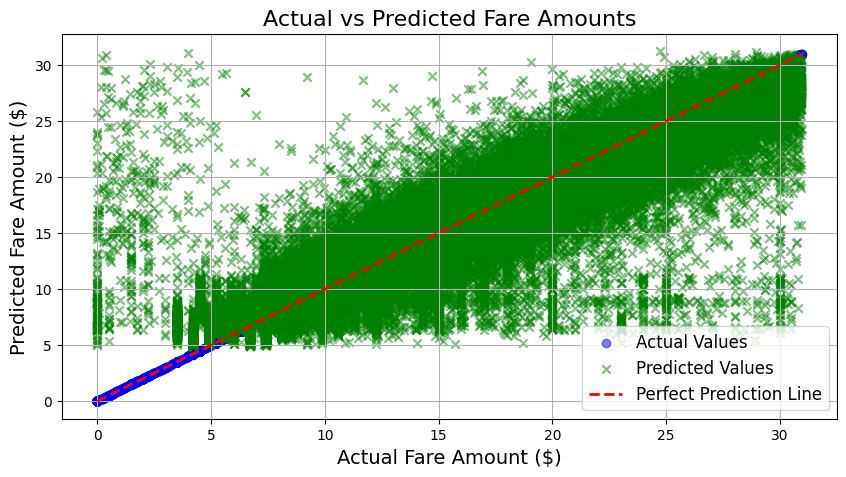

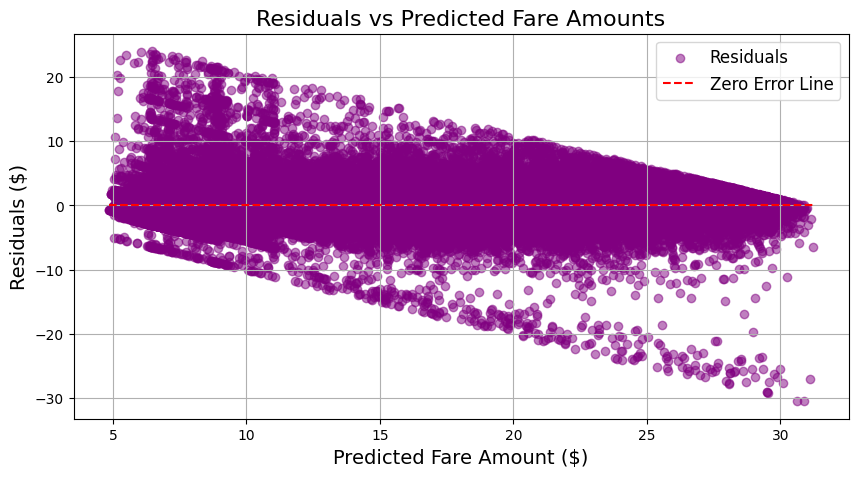

In [6]:
predictor.evaluate_model()

In [7]:
predictor.load_model()

Loading model ...
Model loaded successfully from train_model/best_model_3.pth


In [8]:
predictor.predict_fare_with_user_input()

Day: 5
Hour: 12
Trip Duration: 15.0 Minutes
Trip Distance: 7.0 miles
Predicted Fare: $79.44
Prediction Interval: $76.40 to $82.49
